# This is a mall dataset on which kmeans has been implemented.

In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv('C:\\Users\\admin\\Downloads\\Mall_Customers.csv')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [5]:
x=data.iloc[:,[3,4]]

In [6]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
from sklearn.cluster import KMeans


In [8]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21850.165282585636,
 19672.07284901432]

In [10]:
 import matplotlib.pyplot as plt

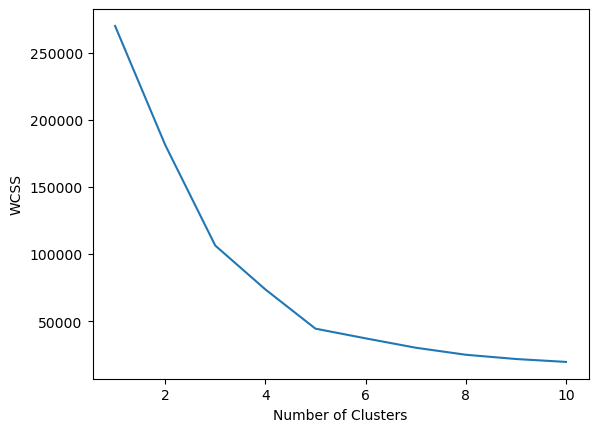

In [11]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# The point at which the elbow shape is created is 5, that is, our K value or an optimal number of clusters is 5. 
#Now let’s train the model on the dataset with a number of clusters 5.

In [13]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [14]:
km=KMeans(n_clusters=5,random_state=0)

In [15]:
km.fit(x)

KMeans(n_clusters=5, random_state=0)

In [16]:
pr=km.predict(x)

In [17]:
pr

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [18]:
d_w_cluster=x.copy()

In [19]:
d_w_cluster['Clusters']=pr

In [20]:
d_w_cluster

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


In [21]:
km.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [22]:
c1x=km.cluster_centers_[0][0]
c1y=km.cluster_centers_[0][1]
c2x=km.cluster_centers_[1][0]
c2y=km.cluster_centers_[1][1]
c3x=km.cluster_centers_[2][0]
c3y=km.cluster_centers_[2][1]
c4x=km.cluster_centers_[3][0]
c4y=km.cluster_centers_[3][1]
c5x=km.cluster_centers_[4][0]
c5y=km.cluster_centers_[4][1]


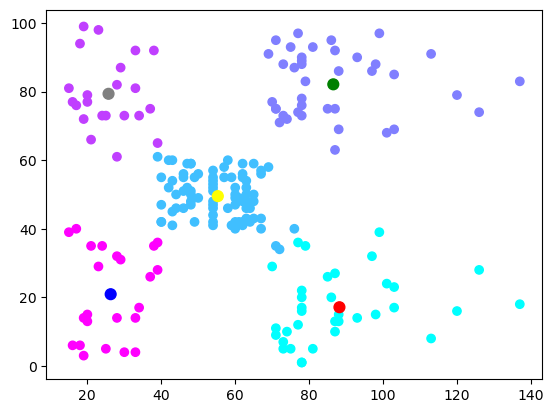

In [31]:
plt.scatter(d_w_cluster['Annual Income (k$)'],d_w_cluster['Spending Score (1-100)'],c=d_w_cluster['Clusters'],cmap='cool')
plt.scatter(x=[c1x,c2x,c3x,c4x,c5x],y=[c1y,c2y,c3y,c4y,c5y],s=60,c=['red','yellow','green','grey','blue'])
#[c1x,c1y],[c2x,c2y],[c3x,c3y],[c4x,c4y],[c5x,c5y],

In [ ]:
c1x=km.cluster_centers_[0][0]
c1y=km.cluster_centers_[0][1]
c2x=km.cluster_centers_[1][0]
c2y=km.cluster_centers_[1][1]
c3x=km.cluster_centers_[2][0]
c3y=km.cluster_centers_[2][1]
c4x=km.cluster_centers_[3][0]
c4y=km.cluster_centers_[3][1]
c5x=km.cluster_centers_[4][0]
c5y=km.cluster_centers_[4][1]